In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.layers import Dense, Flatten, Dropout, SimpleRNN, LSTM, GRU, Bidirectional

from statsmodels.tsa.seasonal import seasonal_decompose


עונה ומגמה

In [2]:
!unzip Air_Passengers.zip -d Air_Passengers

Archive:  Air_Passengers.zip
  inflating: Air_Passengers/AirPassengers.csv  


In [13]:
df= pd.read_csv('Air_Passengers/AirPassengers.csv')

In [14]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [26]:
df.head()

,#Passengers
Month,
1949-01-01,-0.969112
1949-02-01,-0.945946
1949-03-01,-0.891892
1949-04-01,-0.903475
1949-05-01,-0.934363


In [6]:
df.isna().sum()

,0
Month,0
#Passengers,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
df['Month'] = pd.to_datetime(df['Month'], format = '%Y-%m')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


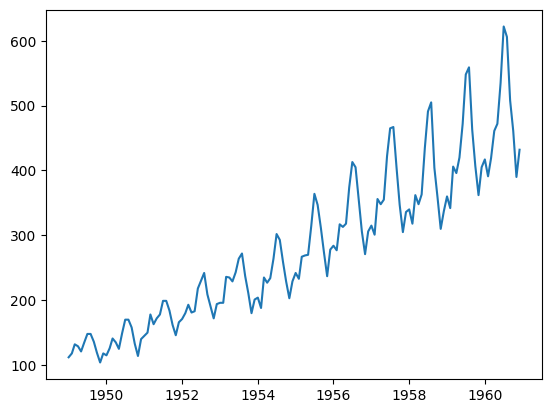

In [18]:

plt.plot(df['Month'],df['#Passengers'])

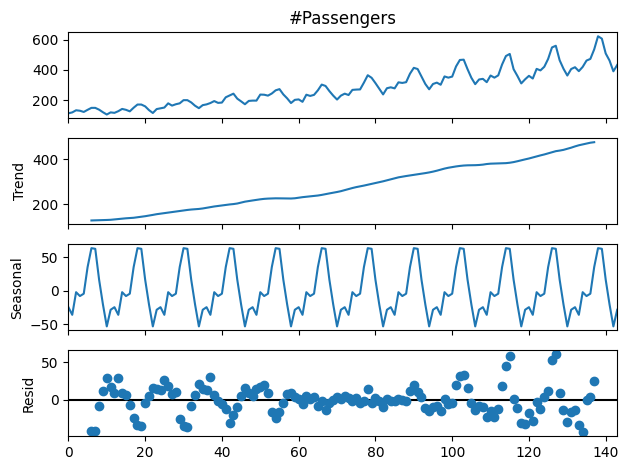

In [21]:
result= seasonal_decompose(df['#Passengers'],model = "additive",period =12 )
result.plot()
plt.show()

In [22]:
df.set_index('Month',inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [25]:
#נורמליזציה
scaler = MinMaxScaler (feature_range  =(-1,1))
df['#Passengers'] = scaler.fit_transform(df[['#Passengers']])

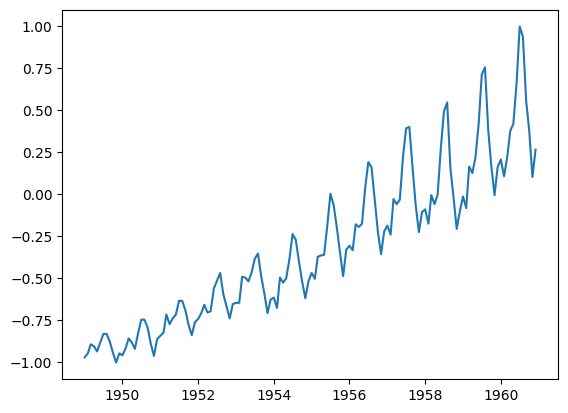

In [28]:
plt.plot(df.index,df['#Passengers'])

In [29]:
#חלונות
def create_sequences (series, window_size):
  X,y =[],[]
  for i in range(len(series)-window_size):
    X.append(series[i:window_size +i])
    y.append(series[window_size +i])
  return np.array(X), np.array(y)

In [31]:
df['#Passengers'].values

array([-0.96911197, -0.94594595, -0.89189189, -0.9034749 , -0.93436293,
       -0.88030888, -0.83011583, -0.83011583, -0.87644788, -0.94208494,
       -1.        , -0.94594595, -0.95752896, -0.91505792, -0.85714286,
       -0.88030888, -0.91891892, -0.82625483, -0.74517375, -0.74517375,
       -0.79150579, -0.88803089, -0.96138996, -0.86100386, -0.84169884,
       -0.82239382, -0.71428571, -0.77220077, -0.73745174, -0.71428571,
       -0.63320463, -0.63320463, -0.69111969, -0.77606178, -0.83783784,
       -0.76061776, -0.74131274, -0.70656371, -0.65637066, -0.7027027 ,
       -0.69498069, -0.55984556, -0.51351351, -0.46718147, -0.59459459,
       -0.66409266, -0.73745174, -0.65250965, -0.64478764, -0.64478764,
       -0.49034749, -0.49420849, -0.51737452, -0.46332046, -0.38223938,
       -0.35135135, -0.48648649, -0.58687259, -0.70656371, -0.62548263,
       -0.61389961, -0.67567568, -0.49420849, -0.52509653, -0.4980695 ,
       -0.38223938, -0.23552124, -0.27027027, -0.4015444 , -0.51

In [32]:
window_size =12 #מחזור של שנה
X, y = create_sequences(df['#Passengers'].values, window_size)

In [33]:
len(X)*0.8

105.60000000000001

In [34]:
int(len(X)*0.8)

105

In [35]:
#train test split : testing the future
split_time = int(len(X)*0.8)
X_train, X_valid = X[:split_time], X[split_time:]
y_train, y_valid = y[:split_time], y[split_time:]


RNN(batch_size, time_stamp,features)    
RNN(כמה דוג יכנסולמודל,גודל החלון,כמה משתנים יש)

In [44]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_valid = X_valid.reshape((X_valid.shape[0],X_valid.shape[1], 1))

In [45]:
model = tf.keras.models.Sequential([
    SimpleRNN(40, return_sequences=True),

    SimpleRNN(40),

    tf.keras.layers.Dense(1)
])



Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.7259 - val_loss: 0.1182 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1041 - val_loss: 0.1447 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0914 - val_loss: 0.1210 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0486 - val_loss: 0.0891 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0234 - val_loss: 0.0645 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175 - val_loss: 0.0495 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0173 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0133 - val_loss: 0.0463 - learning_rate: 0.0010
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0094 - val_loss: 0.0406 - learning_rate: 0.0010
Epoch 10/100
7/7 ━━━━━━━━━━━

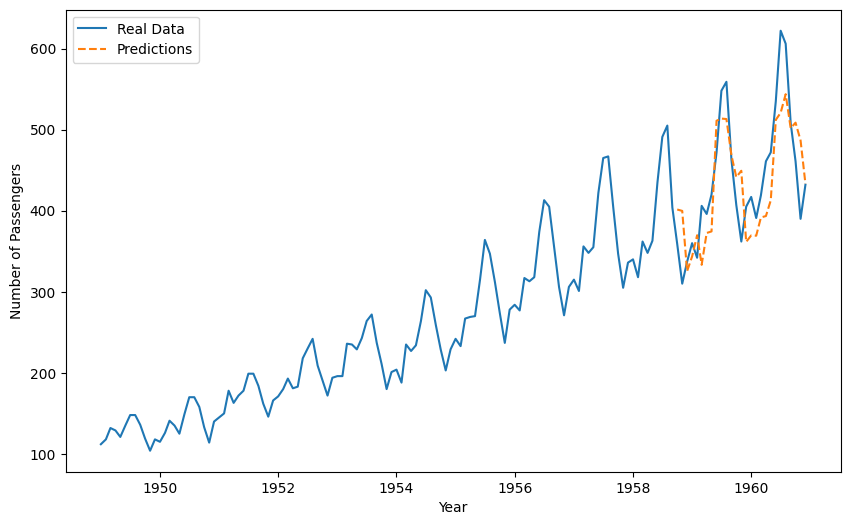

In [46]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)
y_pred = model.predict(X_valid)

# מחזירים את הנתונים לסקאלה המקורית
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_valid = scaler.inverse_transform(y_valid.reshape(-1, 1))

# יצירת ציר זמן
time_valid = df.index[split_time + window_size:]

# הצגת הגרף
plt.figure(figsize=(10,6))
plt.plot(df.index,
         scaler.inverse_transform(df['#Passengers'].values.reshape(-1, 1)),
         label="Real Data")
plt.plot(time_valid, y_pred, label="Predictions", linestyle="dashed")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()